In [860]:
# Regression
# 1.normal equation

In [861]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [862]:
X = np.array([[1],[2],[3],[4]])
y = np.array([8,13,18,23]) 

w = np.random.rand(2)
x0 = np.ones((X.shape[0],1))
x_aug = np.concatenate((x0, X), axis=1)
lr = 0.02
w, x_aug

(array([0.51631532, 0.74927081]),
 array([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]]))

In [863]:
def mse_loss(y_hat, y):
    return np.round(mean_squared_error(y_hat, y),3)


In [864]:
def n_equation(X,y):
    return np.linalg.inv(X.T@X)@X.T@y

w = n_equation(x_aug, y)
y_hat = np.dot(x_aug,w)
loss = mse_loss(y_hat, y)
w, loss

(array([3., 5.]), np.float64(0.0))

In [865]:
W = []
W0 = []
W1 = []
losses = []
for i in range(50):
    for j in range(2):
        if j ==0:
            change = i*0.1
            new_w0 = w[0] + change
            W0.append(new_w0)

        else:
            change = -i*0.1
            new_w1 = w[1] + change
            W1.append(new_w1)

        new_w = w + change
        W.append(new_w)
        losses.append(mse_loss(np.dot(x_aug,new_w),y))


# losses, W

In [866]:
W = np.array(W)


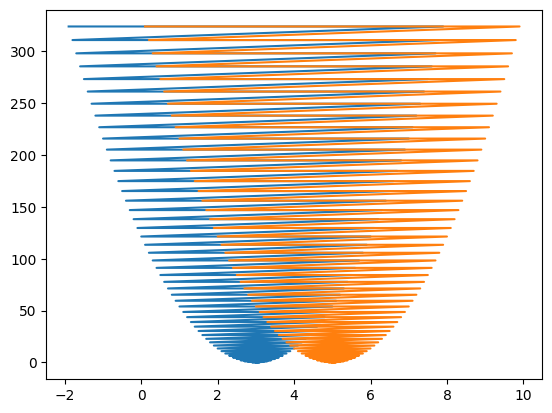

In [867]:
plt.plot(W,losses)
plt.show()

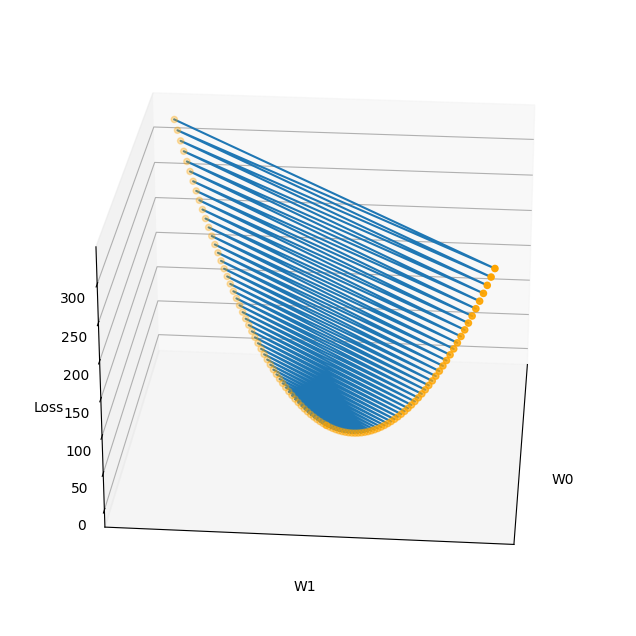

In [868]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d', elev=25, azim= 5)
ax.scatter3D(W[:,0], W[:,1], losses, color = 'orange')
ax.plot(W[:,0], W[:,1], losses)
ax.set_xlabel('W0')
ax.set_xticks([])
ax.set_ylabel('W1')
ax.set_yticks([])
ax.set_zlabel('Loss')
plt.show()


In [869]:
# 2.batch gradient descent

In [870]:
X = np.array([[1],[2],[3],[4]])
y = np.array([8,13,18,23]) 

w = np.random.rand(2)
x0 = np.ones((X.shape[0],1))
x_aug = np.concatenate((x0, X), axis=1)
lr = 0.002

w, x_aug

(array([0.06644383, 0.55603816]),
 array([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]]))

In [871]:
def reg_predict(X, w):
    return np.dot(X, w)


def mse_loss(error):
    return np.sum(error*error)/error.shape[0]

def cal_gradient(X, error):
    return (1/len(X))*(np.dot(X.T,error))


def update_weight(w, lr, gradient):
    return w-(lr*gradient)


def train_BGD(X,y,w,lr):
    losses = []
    W = []
    for epoch in range(1000):
        y_hat = reg_predict(x_aug, w)
        error = y_hat-y
        loss = mse_loss(error)
        gradient = cal_gradient(x_aug, error)
        w = update_weight(w, lr, gradient)
        W.append(w)
        losses.append(loss)
    return losses, W

In [872]:
losses, W = train_BGD(x_aug, y,w,lr)
W = np.array(W)

In [873]:
W.shape

(1000, 2)

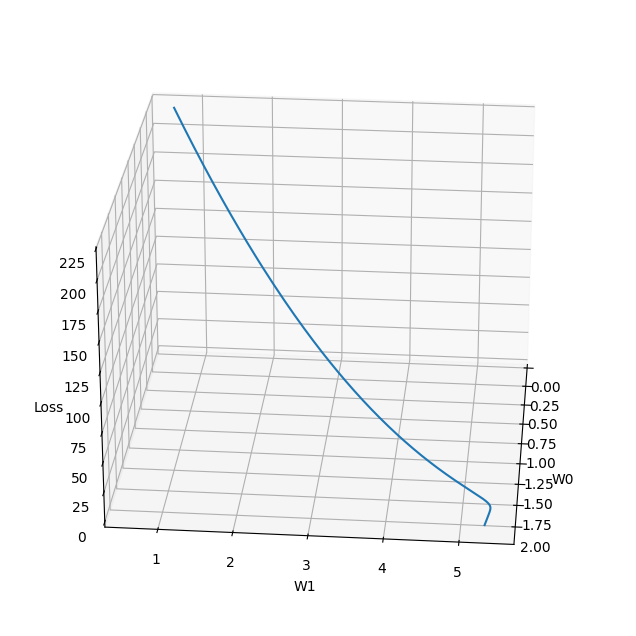

In [874]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d', elev=25, azim=5)
# ax.scatter3D(W[:,0], W[:,1], losses, color = 'orange')
ax.plot(W[:,0], W[:,1], losses)
ax.set_xlabel('W0')
# ax.set_xticks([])
ax.set_ylabel('W1')
# ax.set_yticks([])
ax.set_zlabel('Loss')
plt.show()

In [875]:
losses[-1], W[-1]

(np.float64(0.14916990359939722), array([2.05520766, 5.32134434]))

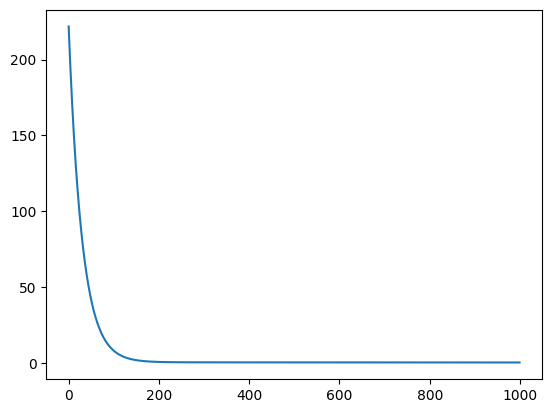

In [876]:
plt.plot(losses)
plt.show()

In [877]:
X = np.array([[1],[2],[3],[4]])
y = np.array([8,13,18,23]) 

w = np.random.rand(2)
x0 = np.ones((X.shape[0],1))
x_aug = np.concatenate((x0, X), axis=1)
m = len(X)
n_epochs = 1000

w, x_aug

(array([0.16732537, 0.75860725]),
 array([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]]))

In [878]:
def calc_lr(t, a=1, b=1000):
    return a/(b+t)

def reg_predict(X, w):
    return np.dot(X, w)


def mse_loss(error):
    return np.sum(error*error)/error.shape[0]

def cal_gradient(X, error):
    return (1/len(X))*(np.dot(X.T,error))


def update_weight(w, lr, gradient):
    return w-(lr*gradient)


def train_SGD(X,y,w,n_epochs):
    losses = []
    W = []
    for epoch in range(n_epochs):
        for iteration in range(m):
            lr = calc_lr(epoch+iteration)
            i = np.random.randint(0,m)
            xi = X[i:i+1]
            yi = y[i:i+1]
            y_hat = reg_predict(xi, w)
            error = y_hat-yi
            loss = mse_loss(error)
            gradient = cal_gradient(xi, error)
            w = update_weight(w, lr, gradient)
            W.append(w)
            losses.append(loss)
    return losses, W


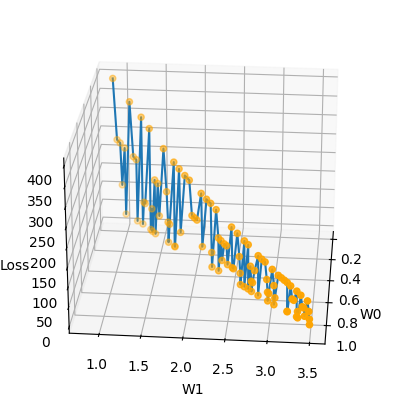

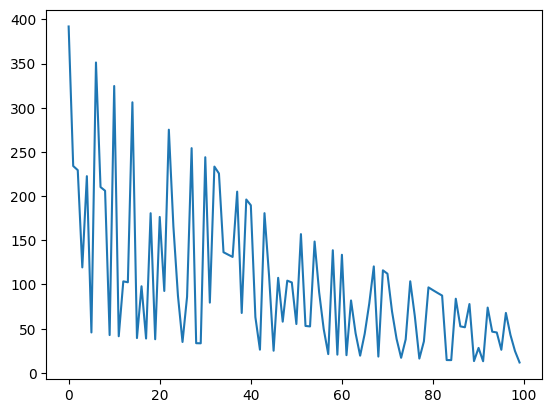

np.float64(0.07493991353633081)

In [879]:
losses, W = train_SGD(x_aug, y,w,n_epochs)
W = np.array(W)


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d', elev=25, azim=5)
ax.scatter3D(W[:100,0], W[:100,1], losses[:100], color = 'orange')
ax.plot(W[:100,0], W[:100,1], losses[:100])
ax.set_xlabel('W0')
# ax.set_xticks([])
ax.set_ylabel('W1')
# ax.set_yticks([])
ax.set_zlabel('Loss')
plt.show()

plt.plot(losses[:100])
plt.show()
losses[-1]

In [880]:
X = np.array([[1],[2],[3],[4]])
y = np.array([8,13,18,23]) 

w = np.random.rand(2)
x0 = np.ones((X.shape[0],1))
x_aug = np.concatenate((x0, X), axis=1)
m = len(X)
n_epochs = 1000
batch_size = 2
w, x_aug

(array([0.80536386, 0.2558231 ]),
 array([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]]))

In [881]:
def calc_lr(t, a=1, b=1000):
    return a/(b+t)

def reg_predict(X, w):
    return np.dot(X, w)


def mse_loss(error):
    return np.sum(error*error)/error.shape[0]

def cal_gradient(X, error):
    return (1/len(X))*(np.dot(X.T,error))


def update_weight(w, lr, gradient):
    return w-(lr*gradient)


def train_MGD(X,y,w,n_epochs,batch_size):
    losses = []
    W = []
    for epoch in range(n_epochs):
        new_index = np.random.permutation(len(X))
        new_x = X[new_index]
        new_y = y[new_index]
        for iteration in range(0,m,batch_size):
            lr = calc_lr(epoch+iteration/batch_size)
            xi = new_x[iteration:iteration+batch_size]
            yi = new_y[iteration:iteration+batch_size]
            y_hat = reg_predict(xi, w)
            error = y_hat-yi
            loss = mse_loss(error)
            gradient = cal_gradient(xi, error)
            w = update_weight(w, lr, gradient)
            W.append(w)
            losses.append(loss)
    return losses, W

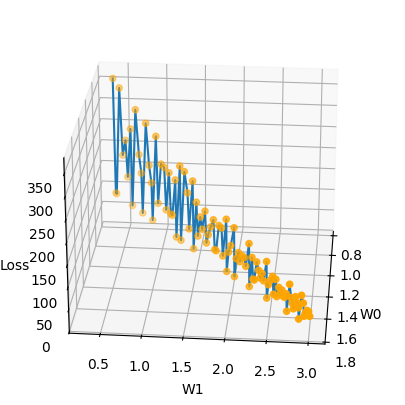

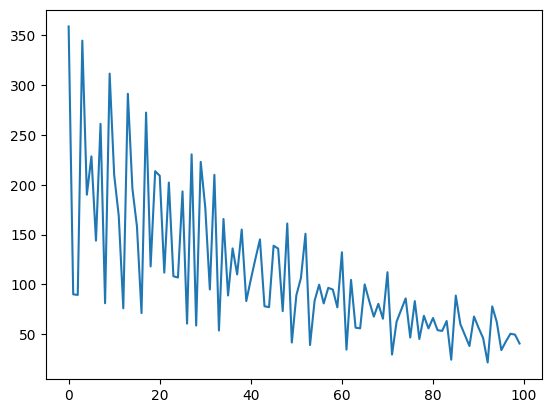

np.float64(0.0506934330755921)

In [882]:
losses, W = train_MGD(x_aug, y,w,n_epochs,batch_size)
W = np.array(W)


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d', elev=25, azim=5)
ax.scatter3D(W[:100,0], W[:100,1], losses[:100], color = 'orange')
ax.plot(W[:100,0], W[:100,1], losses[:100])
ax.set_xlabel('W0')
# ax.set_xticks([])
ax.set_ylabel('W1')
# ax.set_yticks([])
ax.set_zlabel('Loss')
plt.show()

plt.plot(losses[:100])
plt.show()
losses[-1]